# Lesson 3: Building an Agent Reasoning Loop

## Setup

In [1]:
from helper import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()

In [2]:
import nest_asyncio
nest_asyncio.apply()

## Load the data

To download this paper, below is the needed code:

#!wget "https://openreview.net/pdf?id=VtmBAGCN7o" -O metagpt.pdf

**Note**: The pdf file is included with this lesson. To access it, go to the `File` menu and select`Open...`.

## Setup the Query Tools

In [3]:
from utils import get_doc_tools

vector_tool, summary_tool = get_doc_tools("metagpt.pdf", "metagpt")

## Setup Function Calling Agent

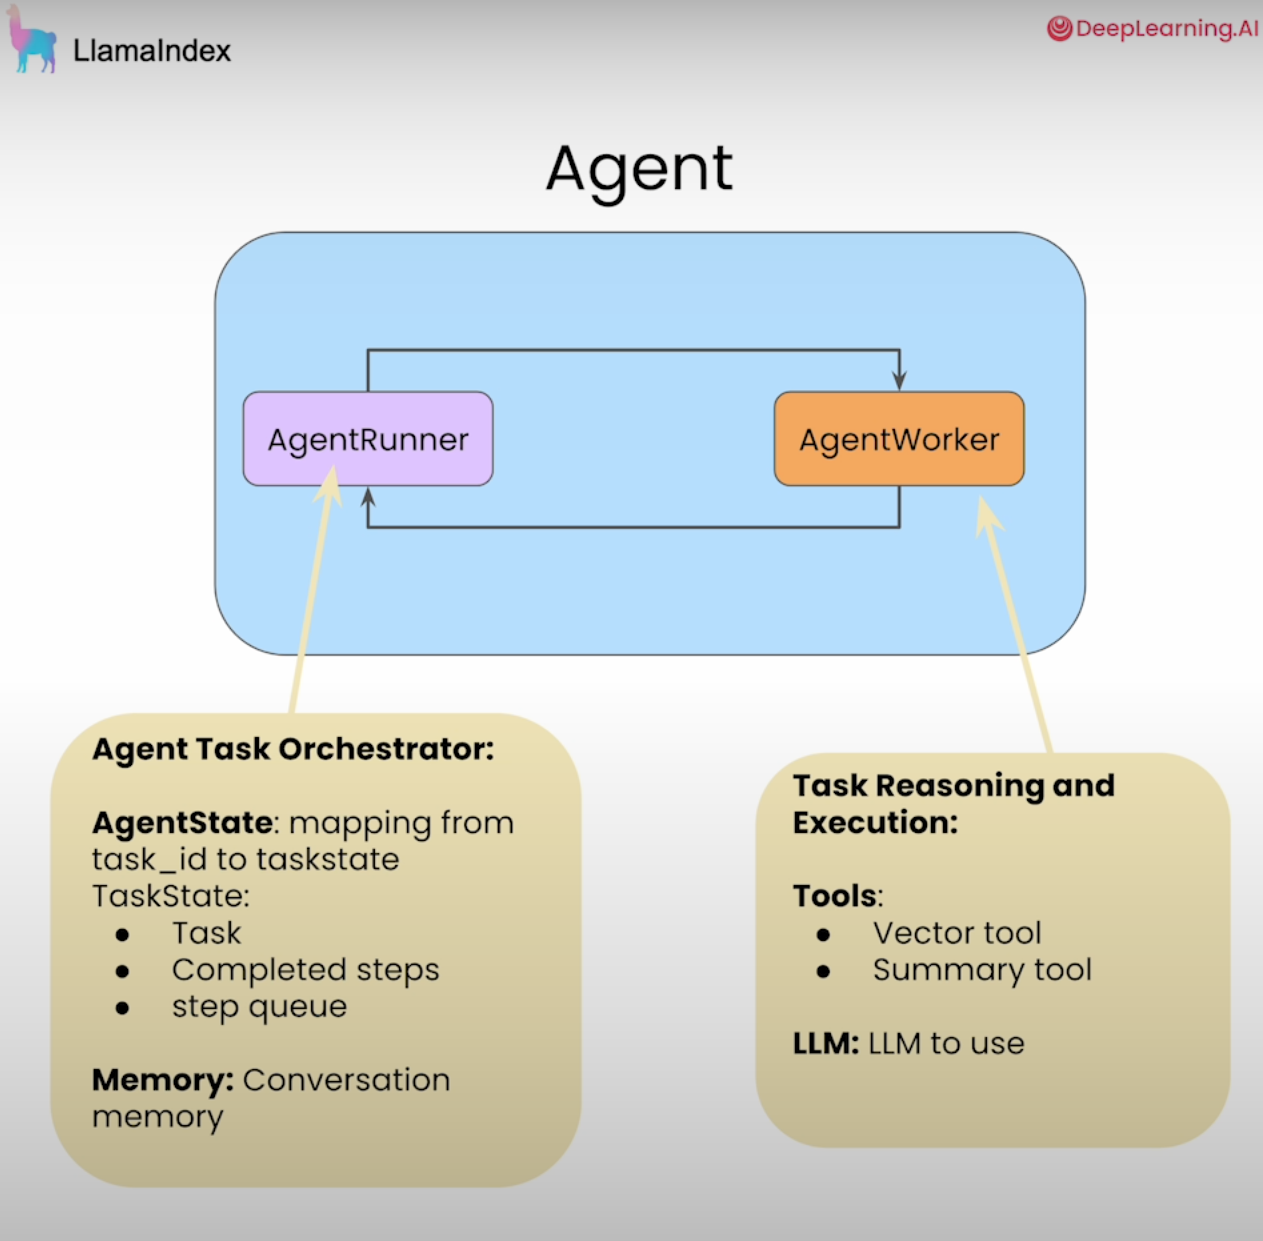

In [4]:
from llama_index.llms.openai import OpenAI

llm = OpenAI(model="gpt-3.5-turbo", temperature=0)

In [5]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_tool, summary_tool], 
    llm=llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [6]:
response = agent.query(
    "Tell me about the agent roles in MetaGPT, "
    "and then how they communicate with each other."
)

Added user message to memory: Tell me about the agent roles in MetaGPT, and then how they communicate with each other.
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "agent roles in MetaGPT"}
=== Function Output ===
The agent roles in MetaGPT include Product Manager, Architect, Project Manager, Engineer, Developer, and QA Engineer. Each role has specific responsibilities tailored to different aspects of the collaborative framework, such as conducting business-oriented analysis, translating requirements into system design components, distributing tasks, executing code, formulating test cases, generating Product Requirement Documents (PRDs), devising technical specifications, managing program call flow, and ensuring software quality through testing. These roles work together in a sequential workflow following Standard Operating Procedures (SOPs) to efficiently tackle complex tasks within the MetaGPT framework.
=== Calling Function ===
Calling functio

In [7]:
print(response.source_nodes[0].get_content(metadata_mode="all"))

page_label: 1
file_name: metagpt.pdf
file_path: metagpt.pdf
file_type: application/pdf
file_size: 16911937
creation_date: 2024-10-01
last_modified_date: 2024-06-24

Preprint
METAGPT: M ETA PROGRAMMING FOR A
MULTI -AGENT COLLABORATIVE FRAMEWORK
Sirui Hong1∗, Mingchen Zhuge2∗, Jonathan Chen1, Xiawu Zheng3, Yuheng Cheng4,
Ceyao Zhang4,Jinlin Wang1,Zili Wang ,Steven Ka Shing Yau5,Zijuan Lin4,
Liyang Zhou6,Chenyu Ran1,Lingfeng Xiao1,7,Chenglin Wu1†,J¨urgen Schmidhuber2,8
1DeepWisdom,2AI Initiative, King Abdullah University of Science and Technology,
3Xiamen University,4The Chinese University of Hong Kong, Shenzhen,
5Nanjing University,6University of Pennsylvania,
7University of California, Berkeley,8The Swiss AI Lab IDSIA/USI/SUPSI
ABSTRACT
Remarkable progress has been made on automated problem solving through so-
cieties of agents based on large language models (LLMs). Existing LLM-based
multi-agent systems can already solve simple dialogue tasks. Solutions to more
complex tasks, however, 

In [8]:
response = agent.chat(
    "Tell me about the evaluation datasets used."
)

Added user message to memory: Tell me about the evaluation datasets used.
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "evaluation datasets used in MetaGPT"}
=== Function Output ===
The evaluation datasets used in MetaGPT include HumanEval, MBPP, and the SoftwareDev dataset.
=== LLM Response ===
The evaluation datasets used in MetaGPT include HumanEval, MBPP, and the SoftwareDev dataset.


In [9]:
response = agent.chat("Tell me the results over one of the above datasets.") #able to check history

Added user message to memory: Tell me the results over one of the above datasets.
=== Calling Function ===
Calling function: vector_tool_metagpt with args: {"query": "results over HumanEval dataset", "page_numbers": ["7"]}
=== Function Output ===
MetaGPT achieved 85.9% and 87.7% Pass rates over the HumanEval dataset.
=== LLM Response ===
MetaGPT achieved pass rates of 85.9% and 87.7% over the HumanEval dataset.


## Lower-Level: Debuggability and Control

Here, we are trying to look into the steps that are being taken for the task

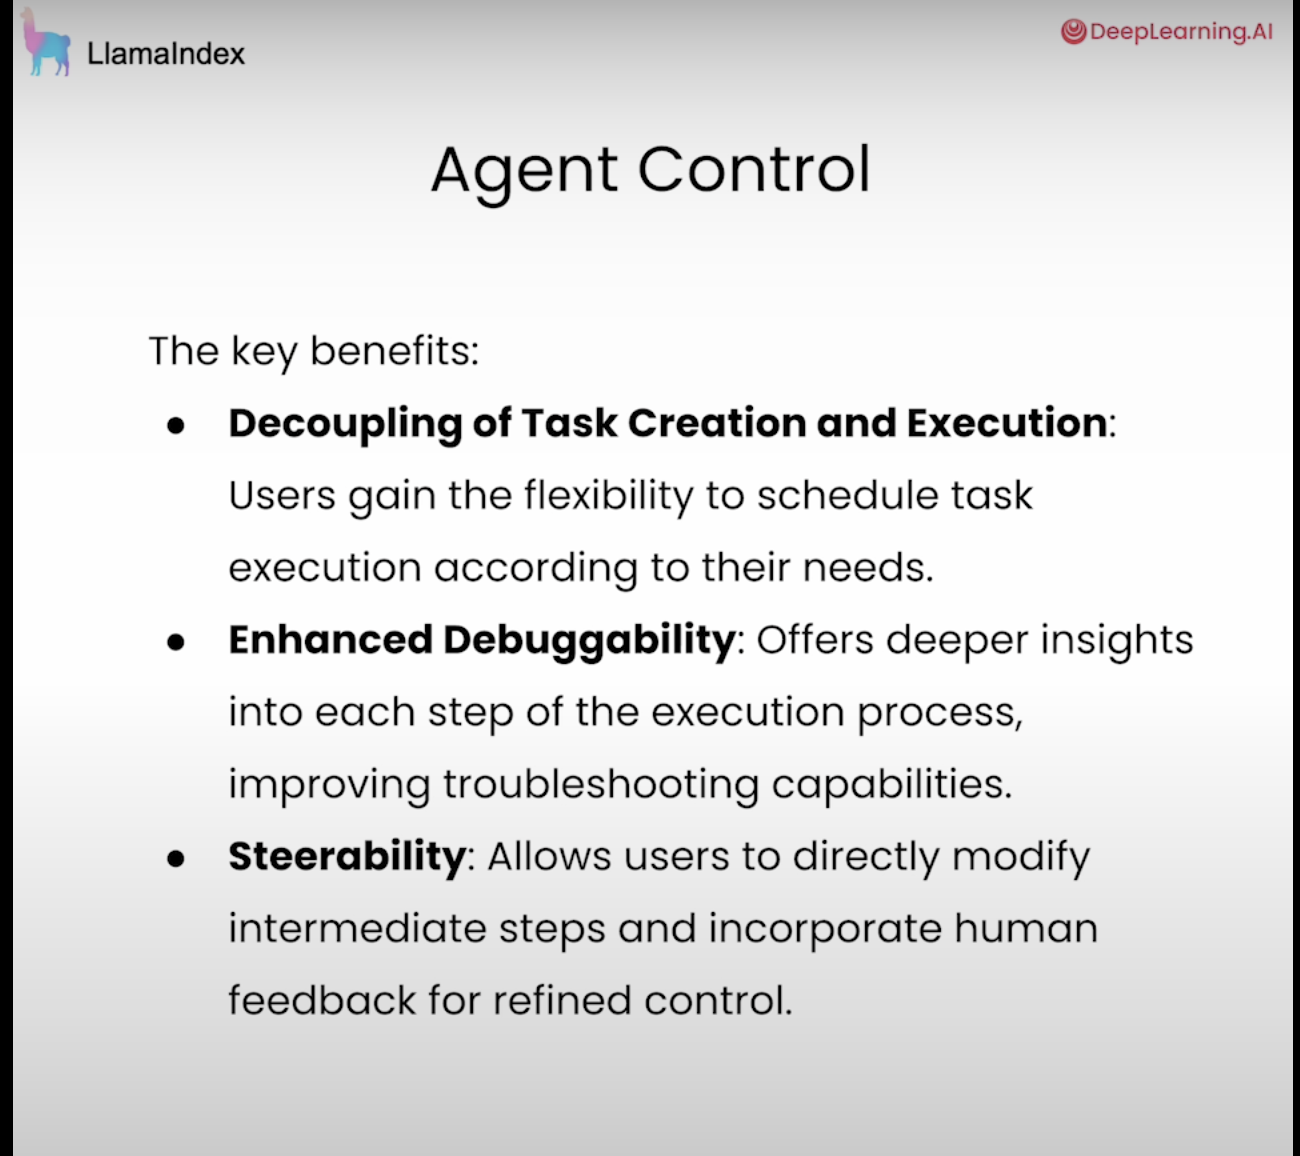

In [10]:
agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_tool, summary_tool], 
    llm=llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [11]:
task = agent.create_task(
    "Tell me about the agent roles in MetaGPT, "
    "and then how they communicate with each other."
)

In [12]:
step_output = agent.run_step(task.task_id)

Added user message to memory: Tell me about the agent roles in MetaGPT, and then how they communicate with each other.
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "agent roles in MetaGPT"}
=== Function Output ===
The agent roles in MetaGPT include Product Manager, Architect, Project Manager, Engineer, and QA Engineer. Each role has specific responsibilities and tasks tailored to their expertise within the collaborative framework of the multi-agent system. The Product Manager conducts business-oriented analysis and generates the Product Requirement Document (PRD). The Architect translates requirements into system design components. The Project Manager distributes tasks based on the system design. Engineers execute code based on assigned tasks. The QA Engineer formulates test cases to ensure code quality. These roles work together following Standard Operating Procedures (SOPs) to efficiently solve problems within the software development process.


In [13]:
completed_steps = agent.get_completed_steps(task.task_id)
print(f"Num completed for task {task.task_id}: {len(completed_steps)}")
print(completed_steps[0].output.sources[0].raw_output)

Num completed for task d64316ec-c131-4eee-b0bc-c7453313c4e6: 1
The agent roles in MetaGPT include Product Manager, Architect, Project Manager, Engineer, and QA Engineer. Each role has specific responsibilities and tasks tailored to their expertise within the collaborative framework of the multi-agent system. The Product Manager conducts business-oriented analysis and generates the Product Requirement Document (PRD). The Architect translates requirements into system design components. The Project Manager distributes tasks based on the system design. Engineers execute code based on assigned tasks. The QA Engineer formulates test cases to ensure code quality. These roles work together following Standard Operating Procedures (SOPs) to efficiently solve problems within the software development process.


In [14]:
upcoming_steps = agent.get_upcoming_steps(task.task_id)
print(f"Num upcoming steps for task {task.task_id}: {len(upcoming_steps)}")
upcoming_steps[0]

Num upcoming steps for task d64316ec-c131-4eee-b0bc-c7453313c4e6: 1


TaskStep(task_id='d64316ec-c131-4eee-b0bc-c7453313c4e6', step_id='cd4bf0ca-c39e-4712-9374-606cf618c7b0', input=None, step_state={}, next_steps={}, prev_steps={}, is_ready=True)

In [15]:
step_output = agent.run_step(
    task.task_id, input="What about how agents share information?"
)

Added user message to memory: What about how agents share information?
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "how agents communicate with each other in MetaGPT"}
=== Function Output ===
Agents in MetaGPT communicate with each other through structured communication interfaces, utilizing documents and diagrams as structured outputs rather than dialogue. They share information using a publish-subscribe mechanism, where they exchange messages directly in a shared message pool. This approach allows agents to access and retrieve necessary information transparently without the need for direct inquiries. Additionally, agents use a subscription mechanism based on their role-specific interests to extract relevant information, ensuring effective communication and task execution.


In [16]:
step_output = agent.run_step(task.task_id)
print(step_output.is_last)

=== LLM Response ===
In MetaGPT, agents communicate with each other through structured communication interfaces using a publish-subscribe mechanism. They exchange messages directly in a shared message pool and access information through documents and diagrams as structured outputs. This approach enables agents to retrieve necessary information transparently without direct inquiries. Agents also use a subscription mechanism based on their role-specific interests to extract relevant information, ensuring effective communication and task execution.
True


In [17]:
response = agent.finalize_response(task.task_id)

In [18]:
print(str(response))

assistant: In MetaGPT, agents communicate with each other through structured communication interfaces using a publish-subscribe mechanism. They exchange messages directly in a shared message pool and access information through documents and diagrams as structured outputs. This approach enables agents to retrieve necessary information transparently without direct inquiries. Agents also use a subscription mechanism based on their role-specific interests to extract relevant information, ensuring effective communication and task execution.
